In [1]:
import sklearn,pandas, sklearn.metrics
import numpy as np
from sklearn import datasets

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
from sklearn.grid_search import GridSearchCV

In [159]:
data = pandas.read_csv('data.train.csv')
data.head()

,user_id,item_id,user_action_count,user_lastday_count,user_buy_count,item_click_count,item_lastday_count,item_buy_count,cat_click_count,cat_buy_count,...,user_item_lastweek_buy,user_item_halfmonth_click,user_item_halfmonth_star,user_item_halfmonth_add_car,user_item_halfmonth_buy,user_item_before_halfmonth_click,user_item_before_halfmonth_star,user_item_before_halfmonth_add_car,user_item_before_halfmonth_buy,buy
0,109210338,248388830,3338,20,3,127,0,1,307261,833,...,0,4,0,0,0,0,0,0,0,0
1,135897509,111578194,769,0,2,11,0,0,23686,154,...,0,0,0,0,0,0,0,0,0,0
2,8598345,231549197,6293,208,11,67,3,0,358271,802,...,0,0,0,0,0,0,0,0,0,0
3,72333767,252905469,1237,16,27,2,0,0,307261,833,...,0,0,0,0,0,0,0,0,0,0
4,103922137,13749512,2622,93,4,2,0,0,300,4,...,0,0,0,0,0,2,0,0,0,0


In [12]:
data.columns

Index([u'user_id', u'item_id', u'user_action_count', u'user_lastday_count', u'user_buy_count', u'item_click_count', u'item_lastday_count', u'item_buy_count', u'cat_click_count', u'cat_buy_count', u'user_cat_count', u'user_cat_lastday_count', u'user_item_count', u'user_item_lastday_count', u'user_add_car', u'user_add_star', u'item_added_car', u'item_added_start', u'user_item_lasttime', u'buy'], dtype='object')

In [20]:
data[[i for i in data.columns if i not in ['user_id','item_id','buy']]]

,user_action_count,user_lastday_count,user_buy_count,item_click_count,item_lastday_count,item_buy_count,cat_click_count,cat_buy_count,user_cat_count,user_cat_lastday_count,user_item_count,user_item_lastday_count,user_add_car,user_add_star,item_added_car,item_added_start,user_item_lasttime
0,1237,16,27,2,0,0,307261,833,134,0,2,0,111,10,0,0,1418342400
1,3465,104,43,4,0,0,122784,709,11,0,3,0,186,20,0,0,1418367600
2,7605,7,293,15,1,1,25230,922,2481,6,10,0,695,334,4,0,1418702400
3,2096,0,17,3,0,0,8,0,5,0,3,0,5,14,0,0,1416312000
4,6516,107,20,11,0,0,311285,838,952,0,2,0,28,0,1,0,1417492800
5,2000,142,6,4,0,0,15246,131,15,0,1,0,167,5,0,0,1417086000
6,220,0,6,470,0,0,105625,357,42,0,2,0,0,0,7,1,1418270400
7,11015,0,67,4,0,0,15782,144,10,0,4,0,131,1446,0,1,1418378400
8,3849,124,36,4,0,0,67255,405,118,0,2,0,68,223,0,0,1418220000
9,4884,0,6,2,0,0,358271,802,368,0,2,0,261,1,0,0,1416319200


In [3]:
import model5 as model
X = model.GetFeature(data)
Y = data['buy'].as_matrix()

In [4]:
X[:10]

array([[  1.19392247e+00,   2.58776404e+00,   5.89349611e-03],
       [ -1.20397280e+00,  -1.20397280e+00,   8.29383886e-03],
       [ -1.20397280e+00,  -1.20397280e+00,   2.14285714e-02],
       [ -1.20397280e+00,  -1.20397280e+00,   1.75438596e-03],
       [ -1.20397280e+00,  -1.20397280e+00,   1.33116883e-02],
       [ -1.20397280e+00,   8.32909123e-01,   8.91632373e-03],
       [ -1.20397280e+00,  -1.20397280e+00,   3.71900826e-02],
       [ -1.20397280e+00,  -1.20397280e+00,   3.02395906e-03],
       [ -1.20397280e+00,  -1.20397280e+00,   1.27024452e-03],
       [ -1.20397280e+00,  -1.20397280e+00,   6.44641418e-03]])

In [23]:
import model5 as model
reload(model)
clf = model.GetModel()
X,Y = model.GetData()
pred = clf.predict(X)


In [24]:
import summary as smr
reload(smr)
smr.summary(Y, pred)
smr.clf_summary(clf)

F1	P	R
1.39	1.07	1.99

 	F	T
N	555	4578467
P	296	6
best score 0.018542286307
best parms {'C': 0.00046415888336127773, 'class_weight': {0: 1, 1: 100.0}}
-3.50566581963 1.73643435987 -0.199353987403 0.0453562444182


In [10]:
print clf.best_estimator_.coef_[0]

[-0.16534085  1.45092141]


In [35]:
print np.sum(Y)
print np.sum(Y[idx]), np.sum(Y[idx]==0)

302
302 0


In [36]:
clf.grid_scores_

[mean: 0.00260, std: 0.00015, params: {'C': 9.9999999999999995e-07, 'class_weight': {0: 1, 1: 100.0}},
 mean: 0.00258, std: 0.00015, params: {'C': 9.9999999999999995e-07, 'class_weight': {0: 1, 1: 166.81005372000593}},
 mean: 0.00232, std: 0.00003, params: {'C': 9.9999999999999995e-07, 'class_weight': {0: 1, 1: 278.2559402207126}},
 mean: 0.00229, std: 0.00006, params: {'C': 9.9999999999999995e-07, 'class_weight': {0: 1, 1: 464.15888336127773}},
 mean: 0.00222, std: 0.00006, params: {'C': 9.9999999999999995e-07, 'class_weight': {0: 1, 1: 774.26368268112697}},
 mean: 0.00211, std: 0.00006, params: {'C': 9.9999999999999995e-07, 'class_weight': {0: 1, 1: 1291.5496650148841}},
 mean: 0.00202, std: 0.00006, params: {'C': 9.9999999999999995e-07, 'class_weight': {0: 1, 1: 2154.4346900318824}},
 mean: 0.00195, std: 0.00007, params: {'C': 9.9999999999999995e-07, 'class_weight': {0: 1, 1: 3593.8136638046258}},
 mean: 0.00185, std: 0.00008, params: {'C': 9.9999999999999995e-07, 'class_weight': {0

In [5]:
data['buy'].value_counts()

0    3539017
1        574
dtype: int64

In [6]:
counts = data['user_item_lastday_count'].value_counts()

In [33]:
np.corrcoef(X[:,0], X[:,1])

array([[ 1.        ,  0.41131407],
       [ 0.41131407,  1.        ]])

In [ ]:
clf.fit(X,Y)

In [43]:
import imp
fp, pathname, description = imp.find_module('model5')
model = imp.load_module('model5', fp, pathname, description)

In [51]:
fp.close()

In [35]:
import pickle
f = open('model1.model','rb')
clf = pickle.load(f)
f.close()

In [13]:
clf.best_params_

{'C': 0.0021544346900318821, 'class_weight': {0: 1, 1: 120}}

In [8]:
clf = LogisticRegression(class_weight={0:1,1:120}, C=0.0021544346900318821)
clf.fit(X,Y)
print clf.intercept_,clf.coef_
print f1_score(Y, clf.predict(X))*100

[-3.33515274] [[ 1.44801788]]
2.02360876897


In [42]:
np.sum(Y)

302

In [29]:
print clf.best_score_,clf.best_params_

0.0209094022246 {'C': 0.00021544346900318845, 'class_weight': {0: 1, 1: 100}}


In [25]:
print np.sum(Y)
predX = clf.predict(X)
print np.sum(predX)
print sklearn.metrics.recall_score(Y, predX), sklearn.metrics.precision_score(Y, predX)
print f1_score(Y, predX)

87
186
0.0574712643678 0.0268817204301
0.03663003663


In [23]:
print np.sum(clf.predict(X_test))

358


In [22]:
print clf.intercept_,clf.coef_

[-4.57766365] [[ 0.65020026  1.34236491]]


In [12]:
y = np.zeros(20)
t = np.linspace(5,100,20)
for i in range(20):
    y[i] = f1_score(Y,X[:,0]>np.log(0.3+t[i]))


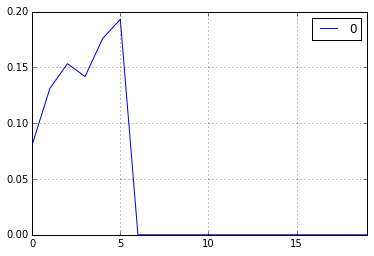

In [13]:
%matplotlib inline
pandas.DataFrame(y*100).plot()

In [16]:
print t[5],y[5]
# print X_test
print f1_score(Y_test,(X_test['user_item_count']>t[3]))

30.0 0.0019305019305
0.0


In [5]:
import pickle
with open('model3.model','rb') as f:
    clf = pickle.load(f)
print clf

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=16,
       param_grid={'C': array([  1.00000e-06,   5.99484e-06,   3.59381e-05,   2.15443e-04,
         1.29155e-03,   7.74264e-03,   4.64159e-02,   2.78256e-01,
         1.66810e+00,   1.00000e+01]), 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 10}, {0: 1, 1: 30}, {0: 1, 1: 100}, {0: 1, 1: 300}, {0: 1, 1: 1000}]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring='f1',
       verbose=0)


In [18]:
print clf.best_score_*100
print clf.best_params_

1.00400405829
{'C': 0.001291549665014884, 'class_weight': {0: 1, 1: 100}}


In [15]:
est = clf.estimator

In [16]:
print clf.score(X,Y)
print clf.predict(X)

0.0194432169686
[0 0 0 ..., 0 0 0]


In [22]:
clf.estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [34]:
data_test['buy'].value_counts()

0    1179196
1        215
dtype: int64

In [47]:
clf.score(X_test,Y_test)

0.99981770561746497

In [49]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
f1_score(Y_test,pred)

0.019891500904159132

In [38]:
np.mean(data_test['buy']==0)

0.99981770561746497

In [23]:
np.mean(pred[:,0]>0.995)

0.99871800415631196

In [65]:
data['buy'].value_counts()

0    3539017
1        574
dtype: int64

In [1]:
data_pred = pandas.read_csv('data.csv')
X_pred=np.log(0.3+data_pred[['user_item_count','user_item_lastday_count']])
Y_pred=data_pred['buy']

NameError: name 'pandas' is not defined

In [7]:
np.array([1,2])+4

array([5, 6])

In [8]:
items = pandas.read_csv('tianchi_mobile_recommend_train_item.csv')


In [14]:
tids=items['item_id']

In [30]:
tids[0]

327414838

In [32]:
'327414838' in list(tids)

False

In [14]:
items = pandas.read_csv('tianchi_mobile_recommend_train_item.csv')

In [17]:
nrow = 10000
start = 0
fr = pandas.read_csv('feature.csv',iterator=True)

In [43]:
'buy' in data.keys()

True

In [25]:
if 0:
    print 111

In [10]:
arr=[1,2,3,4,5,6]
arr[1,2]

TypeError: list indices must be integers, not tuple

In [160]:
fr = pandas.read_csv('data.csv', iterator=True, chunksize=1)

In [161]:
df=fr.get_chunk()
for i in  df.columns.values:
    print i

user_id
item_id
user_action_count
user_lastday_count
user_buy_count
item_click_count
item_lastday_count
item_buy_count
cat_click_count
cat_buy_count
user_cat_count
user_cat_lastday_count
user_item_count
user_item_lastday_count
user_add_car
user_add_star
item_added_car
item_added_start
user_item_lasttime
cat_add_car
cat_add_star
user_item_buy
user_item_lastweek_click
user_item_lastweek_star
user_item_lastweek_add_car
user_item_lastweek_buy
user_item_halfmonth_click
user_item_halfmonth_star
user_item_halfmonth_add_car
user_item_halfmonth_buy
user_item_before_halfmonth_click
user_item_before_halfmonth_star
user_item_before_halfmonth_add_car
user_item_before_halfmonth_buy
user_cat_lastweek_click
user_cat_lastweek_star
user_cat_lastweek_add_car
user_cat_lastweek_buy
user_cat_halfmonth_click
user_cat_halfmonth_star
user_cat_halfmonth_add_car
user_cat_halfmonth_buy
user_cat_before_halfmonth_click
user_cat_before_halfmonth_star
user_cat_before_halfmonth_add_car
user_cat_before_halfmonth_buy
bu

In [51]:
fr.end

AttributeError: 'TextFileReader' object has no attribute 'end'

In [74]:
[1]==1

False

In [76]:
clf.predict([1,1])==0

array([ True], dtype=bool)

模型3

In [3]:
import model0 as model
clf = model.GetModel()

In [4]:
data = pandas.read_csv('data.csv.subset.csv')
data.head()

,user_id,item_id,user_item_count,user_item_lastday_count,buy
0,8036273,360815626,3,3,0
1,27751835,244322130,1,0,0
2,98692568,371781541,2,0,0
3,69051488,86334753,1,0,0
4,65801616,117337750,1,0,0


In [24]:

X=data[['user_item_count' , 'user_item_lastday_count']].as_matrix()


Y=data['buy'].as_matrix()

In [5]:
data['item_to_cat_rate'] = data['user_item_lastday_count'] / (1 + data['user_cat_lastday_count'])
data['user_item_lastday_count'] = np.log(0.3+data['user_item_lastday_count'])

X=data[['user_item_lastday_count','item_to_cat_rate']].as_matrix()


Y=data['buy'].as_matrix()

In [5]:
X,Y = model.GetData()
clf.score(X,Y)

C:\Python27\lib\site-packages\sklearn\grid_search.py:370: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


0.018018018018018018

In [27]:
np.sum(clf.predict(X))

1263

In [28]:
np.corrcoef(X[:,0],X[:,1])

array([[ 1.        ,  0.07609058],
       [ 0.07609058,  1.        ]])

In [29]:
clf.best_params_

{'C': 0.0001, 'class_weight': {0: 1, 1: 150}}

In [20]:
import model7 as model

In [23]:
X,Y = model.GetData()
X.head()

,user_action_count,user_lastday_count,user_buy_count,item_click_count,item_lastday_count,item_buy_count,cat_click_count,cat_buy_count,user_cat_count,user_cat_lastday_count,user_item_count,user_item_lastday_count,user_add_car,user_add_star,item_added_car,item_added_start,user_item_lasttime
0,8.113217,3.010621,1.193922,4.846547,-1.203973,0.262364,12.635454,6.725394,5.372032,-1.203973,1.458615,-1.203973,4.209160,4.567468,1.667707,1.667707,21.072458
1,6.645481,-1.203973,0.832909,2.424803,-1.203973,-1.203973,10.072652,5.038899,5.160778,-1.203973,0.832909,-1.203973,0.262364,-1.203973,0.262364,-1.203973,21.073029
2,8.747241,5.338979,2.424803,4.209160,1.193922,-1.203973,12.789046,6.687483,6.743234,3.720862,0.832909,-1.203973,4.950885,4.885072,-1.203973,0.262364,21.072849
3,7.120687,2.791165,3.306887,0.832909,-1.203973,-1.203973,12.635454,6.725394,4.900076,-1.203973,0.832909,-1.203973,4.712229,2.332144,-1.203973,-1.203973,21.072755
4,7.871807,4.535820,1.458615,0.832909,-1.203973,-1.203973,5.704782,1.458615,3.918005,-1.203973,0.832909,-1.203973,1.193922,3.230804,-1.203973,-1.203973,21.071693


In [24]:
clf = model.GetModel()

In [25]:
pred = clf.predict(X)

In [26]:
pandas.value_counts(pred)

0    91683
1       51
dtype: int64

In [28]:
clf.best_score_

0.13085441987391869

In [17]:
X=0
data=0


In [56]:
import time

In [57]:
time.ctime()

'Thu Apr 02 13:39:12 2015'

In [62]:
t=time.strptime('2014-12-18 10','%Y-%m-%d %H')

In [66]:
time.mktime(t)

1418868000.0

In [72]:
pandas.value_counts((data['buy']==1) | (np.random.rand(len(data))<0.01))

False    4533311
True       46013
dtype: int64

In [73]:
idx=(data['buy']==1) | (np.random.rand(len(data))<0.01)

In [23]:
idx = data['buy']==1

In [30]:
np.sum((~idx) * np.random.rand(len(idx)))

2319.0124061381648

In [50]:
import model8 as model
reload(model)
import summary
reload(summary)

<module 'summary' from 'summary.py'>

In [51]:
X,Y=model.GetData()

In [70]:
X.columns.values

array(['user_action_count', 'user_lastday_count', 'user_buy_count',
       'item_click_count', 'item_lastday_count', 'item_buy_count',
       'cat_click_count', 'cat_buy_count', 'user_cat_count',
       'user_cat_lastday_count', 'user_item_count',
       'user_item_lastday_count', 'user_add_car', 'user_add_star',
       'item_added_car', 'item_added_start', 'user_item_lasttime',
       'item_convert_rate', 'user_convert_rate'], dtype=object)

In [72]:
X[['item_click_count','item_buy_count','item_convert_rate']][:50]

,item_click_count,item_buy_count,item_convert_rate
0,4.846547,0.262364,0.007812
1,2.424803,-1.203973,0.000000
2,4.209160,-1.203973,0.000000
3,0.832909,-1.203973,0.000000
4,0.832909,-1.203973,0.000000
5,0.832909,-1.203973,0.000000
6,1.458615,-1.203973,0.000000
7,0.262364,-1.203973,0.000000
8,1.193922,-1.203973,0.000000
9,0.262364,-1.203973,0.000000


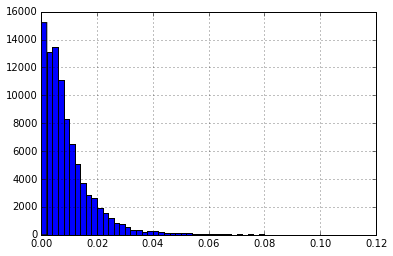

In [68]:
%matplotlib inline
X['user_convert_rate'].hist(bins=50,range=(0,0.1))

In [49]:
clf = model.GetModel()
feature_names = [i for i in X.columns if i not in ['user_id','item_id','buy']]
summary.clf_summary(clf, feature_names)

best score 0.130854419874
best parms {'C': 0.69519279617756058}
clf parms:
intercept	0.000000
user_action_count	-0.371763
user_lastday_count	-0.066816
user_buy_count	0.331509
item_click_count	-0.502071
item_lastday_count	-0.002984
item_buy_count	-0.457847
cat_click_count	-0.802509
cat_buy_count	0.858689
user_cat_count	-0.260454
user_cat_lastday_count	0.208004
user_item_count	1.295417
user_item_lastday_count	1.064782
user_add_car	0.031094
user_add_star	0.109781
item_added_car	1.082721
item_added_start	0.036579
user_item_lasttime	0.030474




In [45]:
summary.TestModel('model7')

===== for test =====
 	F	T
N	4577313	1709
P	279	23
F1	P	R
2.26	1.33	7.62


(23.0, 1709.0, 279.0, 4577313.0)

In [62]:
P = float(TP)/(TP+TN)
0.

0.0

In [11]:
data = reader.get_chunk()

NameError: name 'reader' is not defined

In [54]:
X_test = model.GetFeature(data)
Y_test = data['buy'].as_matrix()
pred = clf.predict(X_test)

TP = TP + np.sum(Y_test * pred)
TN = TN + np.sum((1-Y_test) * pred)
FP = FP + np.sum(Y_test * (1- pred))
FN = FN + np.sum((1- Y_test) * (1- pred))

In [55]:
print TP,TN,FP,FN

15 910 -4 299079


In [53]:
pandas.value_counts((1-pred) )

1    99075
0      925
dtype: int64

In [164]:
block_size = 100000
reader = pandas.read_csv('data.csv', iterator=True, chunksize=block_size)


In [165]:
data = reader.get_chunk()
data.head()

,user_id,item_id,user_action_count,user_lastday_count,user_buy_count,item_click_count,item_lastday_count,item_buy_count,cat_click_count,cat_buy_count,...,user_cat_lastweek_buy,user_cat_halfmonth_click,user_cat_halfmonth_star,user_cat_halfmonth_add_car,user_cat_halfmonth_buy,user_cat_before_halfmonth_click,user_cat_before_halfmonth_star,user_cat_before_halfmonth_add_car,user_cat_before_halfmonth_buy,buy
0,8036273,360815626,9501,338,56,3,3,0,307261,833,...,0,102,2,7,0,632,15,28,0,0
1,27751835,244322130,843,0,7,1,0,0,11819,136,...,1,61,7,2,0,30,0,1,0,0
2,98692568,371781541,559,0,12,2,0,0,3869,68,...,0,2,0,0,0,0,0,0,0,0
3,69051488,86334753,3989,53,7,9,0,0,3178,91,...,0,3,0,0,0,0,0,0,0,0
4,65801616,117337750,3079,117,41,1,0,0,282497,1052,...,0,0,0,0,0,0,0,0,0,0


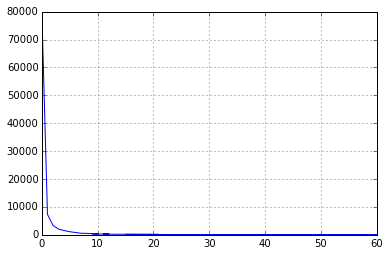

In [169]:
data['user_cat_before_halfmonth_star'].value_counts().plot()

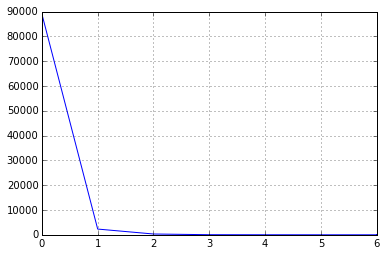

In [150]:
%matplotlib inline
S=data['user_item_before_halfmonth_add_car'] 
arr=S.value_counts()
arr.plot()

In [3]:
pandas.value_counts(data['buy'])

0    168977
1       302
dtype: int64

In [4]:
data[clf.predict_proba(X)[:,1]>0.01]

NameError: name 'clf' is not defined

In [9]:
list(data.keys())

['user_id',
 'item_id',
 'user_action_count',
 'user_lastday_count',
 'user_buy_count',
 'item_click_count',
 'item_lastday_count',
 'item_buy_count',
 'cat_click_count',
 'cat_buy_count',
 'user_cat_count',
 'user_cat_lastday_count',
 'user_item_count',
 'user_item_lastday_count',
 'user_add_car',
 'user_add_star',
 'item_added_car',
 'item_added_start',
 'user_item_lasttime',
 'buy']

In [10]:
X

NameError: name 'X' is not defined

In [13]:
s='fasd.fadsf.afdfd'

In [19]:
s.rfind('.')

10

In [73]:
import time

In [76]:
time.strftime('%H:%m:%s',time.time())

TypeError: argument must be 9-item sequence, not float

In [130]:
import re


s = open('str_format.txt', 'rb').read()

r = re.compile(r'(\w+)\s*=\s*(\w+)', re.MULTILINE)

In [131]:
m=r.findall(s)

In [142]:
r.search(s).group(2)

'dict'

In [120]:
re.search('\w+', s, re.M).group()

'user_item_halfmonth_click'

In [ ]:
data.